# MNIST DATASET 
# Test on classes imbalance

In [1]:
#!pip install seaborn
#!pip install keras
#!pip install tensorflow

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random
import math
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot


from pathlib import Path
import requests
import pickle
import gzip

import torch
import math
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

pd.options.display.float_format = "{:,.4f}".format

In [4]:
# the data, split between train and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train.dtype

dtype('uint8')

In [8]:
x_train.min()

0

In [9]:
x_train.max()

255

In [10]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

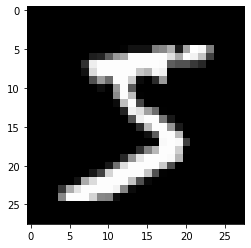

In [11]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Here were are interested to study classes imbalance, so we are focusing our work on 4 classes from 0 to 3

In [12]:
train_index= y_train[:] <= 3

In [13]:
x_train= x_train[train_index]

In [14]:
y_train = y_train[train_index]

In [15]:
x_train.shape

(24754, 28, 28)

In [16]:
y_train.shape

(24754,)

In [17]:
test_index = y_test[:] <= 3

In [18]:
x_test = x_test[test_index]
y_test = y_test[test_index]

In [19]:
x_test.shape

(4157, 28, 28)

In [20]:
y_test.shape

(4157,)

In [21]:
#normalize data 
x_train = x_train/255
x_test = x_test/255

# Ploting

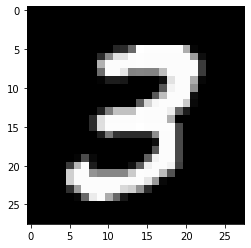

In [22]:
import matplotlib.pyplot as plt

image = x_train[4]
plt.imshow(image, cmap='gray')

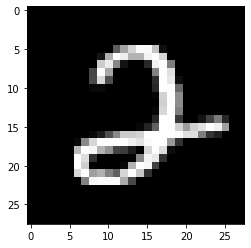

In [23]:
import matplotlib.pyplot as plt

image = x_train[9]
plt.imshow(image, cmap='gray')

<function matplotlib.pyplot.show(close=None, block=None)>

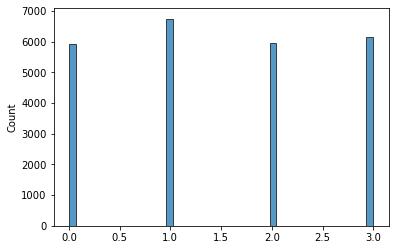

In [24]:
sns.histplot(y_train)
plt.show

# Imbalance learn

In [25]:
from imblearn.datasets import make_imbalance

In [26]:
from collections import Counter
def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

In [27]:
def unbalancing(x_train, y_train, M ,ratio):
  x_unbal = x_train.reshape(-1, 784)
  X = pd.DataFrame(x_unbal)
  X_resampled, y_resampled = make_imbalance(X,
        y_train,
        sampling_strategy=ratio_func,
        **{"multiplier": ratio, "minority_class": M},
    )
  plt.hist(y_resampled)
  plt.title("Ratio ")
  plt.show()
  ### RATIO 
  x_train = X_resampled.to_numpy().reshape(-1,28,28)
  y_train = y_resampled
  return x_train, y_train

# Spliting N Nodes 

In [28]:
def label_index(y_train) : 
    label = {}
    for i in range(len(y_train)) : 
        if y_train[i] in label.keys():
            label[y_train[i]].append(i)
        else : 
            label[y_train[i]] = [i]
                            
    return label

In [29]:
import random
def iid_split(nodes, label_dict) :
    node_dict= {}
    for node in range(nodes):
        node_dict[node] ={}
        number_of_label_per_nodes = {}
        for label in label_dict.keys():
            number_of_label_per_nodes[label] = len(label_dict[label])//nodes
        for label in label_dict.keys():
            for n in range(number_of_label_per_nodes[label]):
                k = random.choice(range(len(label_dict[label])))
                j = label_dict[label].pop(k)
                node_dict[node].append(j)      
    return node_dict, number_of_label_per_nodes, label_dict
            
        

In [30]:
def number_of_labels_by_nodes(nodes, label_dict):
    num_by_node = {}
    for key in label_dict.keys():
        num_by_node[key] = len(label_dict[key])//nodes
    return num_by_node

In [31]:
label_dict = label_index(y_train)

In [32]:
num_by_node= number_of_labels_by_nodes(100,label_dict)

In [33]:
def iid_split(nodes, label_dict, num_by_node) :
    node_dict= {}
    for node in range(nodes):
        node_dict[node] =[]
        for label in label_dict.keys():
            for n in range(num_by_node[label]):
                k = random.choice(range(len(label_dict[label])))
                j = label_dict[label].pop(k)
                node_dict[node].append(j)      
    return node_dict
        

In [34]:
z = iid_split(100,label_dict,num_by_node)

In [35]:
def node_split (x_train, y_train, node_dict):
    x_train_dict = {}
    y_train_dict = {}
    for key in node_dict.keys():
        x_train_dict[key] = np.array([x_train[i-1] for i in z[key]])
        y_train_dict[key] = [y_train[i-1] for i in z[key]]
    return x_train_dict, y_train_dict

In [36]:
x,y = node_split(x_train,y_train,z)

In [37]:
for i in y.keys():
    y[i] = np.array(y[i])

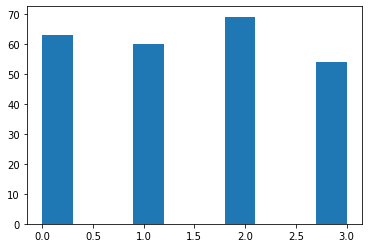

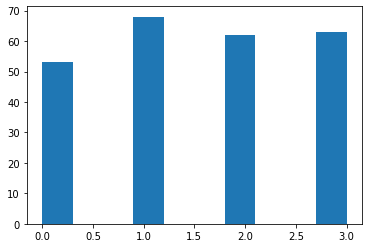

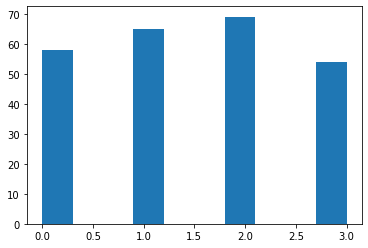

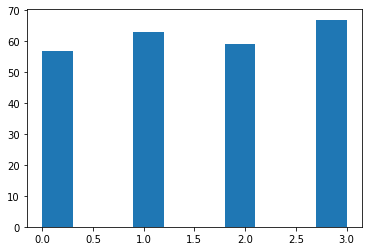

In [38]:
for i in range(4):
    plt.hist(y[i])
    plt.show()

In [39]:
x.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

# Spliting Data in validation and nodes

In [40]:
x_train_dict,x_valid_dict, y_train_dict,  y_valid_dict = {},{},{},{}

In [41]:
from sklearn.model_selection import train_test_split
for i in x.keys():
    x_train_dict['node'+str(i)], x_valid_dict['node'+str(i)], y_train_dict['node'+str(i)],  y_valid_dict['node'+str(i)] = train_test_split(x[i], y[i], random_state=42,stratify= y[i], test_size=0.20)

In [42]:
type(y_train_dict['node0'])

numpy.ndarray

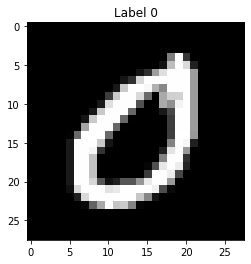

In [43]:
import matplotlib.pyplot as plt

image = x_train_dict['node0'][55]
plt.title('Label {}'.format(y_train_dict['node0'][55]))
plt.imshow(image, cmap='gray')
plt.show()

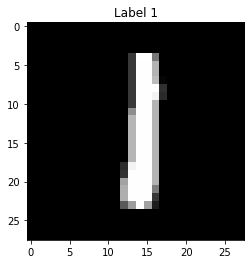

In [44]:
import matplotlib.pyplot as plt

image = x_train_dict['node0'][16]
plt.title('Label {}'.format(y_train_dict['node0'][16]))
plt.imshow(image, cmap='gray')
plt.show()

(array([50.,  0.,  0., 48.,  0.,  0., 55.,  0.,  0., 43.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

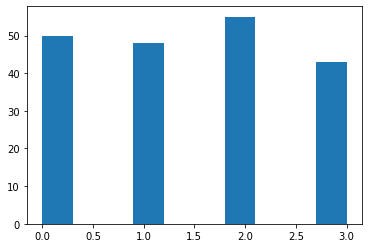

In [45]:
import seaborn as sns
plt.hist(y_train_dict['node0'])

(array([42.,  0.,  0., 54.,  0.,  0., 50.,  0.,  0., 50.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

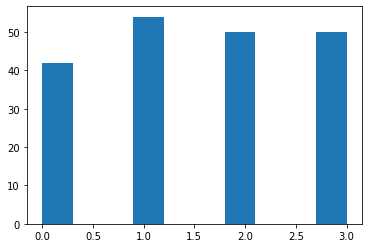

In [46]:
import seaborn as sns
plt.hist(y_train_dict['node1'])

# Model 

In [47]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
import time
import copy
from torch.utils.data import DataLoader, Dataset

In [48]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.resnet = models.resnet18(weights='DEFAULT')
        # change input layer
        # the default number of input channel in the resnet is 3, but our images are 1 channel. So we have to change 3 to 1.
        # nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) <- default
        self.resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        # change fc layer
        # the number of classes in our dataset is 4. default is 1000.
        self.resnet.num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.resnet.num_ftrs, 4)

In [49]:
from tqdm import tqdm
from time import sleep
from tqdm import trange

In [50]:
X=Mymodel() # Model de depart

In [51]:
X.resnet.fc

Linear(in_features=512, out_features=4, bias=True)

In [52]:
#To fit the model 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = X.resnet.to(device)

In [94]:
main_model = model_ft
learning_rate = 0.001
numEpoch = 5

In [54]:
model_ft.fc

Linear(in_features=512, out_features=4, bias=True)

In [55]:
def create_model_dict(number_of_nodes):
    model_dict = dict()
    
    for i in range(number_of_nodes):
        model_name="node"+str(i)
        model_info= Mymodel().resnet
        model_dict.update({model_name : model_info })
        
        
    return model_dict

In [56]:
model_dict = create_model_dict(100)

In [57]:
name_of_x_train_sets=list(x_train_dict.keys())
name_of_y_train_sets=list(y_train_dict.keys())
name_of_x_valid_sets=list(x_valid_dict.keys())
name_of_y_valid_sets=list(y_valid_dict.keys())
#name_of_x_test_sets=list(x_test_dict.keys())
#name_of_y_test_sets=list(y_test_dict.keys())

name_of_models=list(model_dict.keys())
# print(name_of_x_train_sets)
# print(name_of_y_train_sets)
# print(name_of_x_valid_sets)
# print(name_of_y_valid_sets)
# print(name_of_x_test_sets)
# print(name_of_y_test_sets)
# print("\n ------------")
# print(name_of_models)
# print(name_of_optimizers)
# print(name_of_criterions)

In [58]:
#before sending main model to nodes
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])

tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[-0.0438, -0.0175, -0.0273,  0.0197, -0.0218]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0304, -0.0440,  0.0034,  0.0174,  0.0241]],
       grad_fn=<SliceBackward0>)


In [59]:
number_of_nodes =100

In [61]:
model_dict['node0']

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [62]:
for name, param  in main_model.named_parameters():
    print(name)

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv2.we

In [63]:
name_of_models

['node0',
 'node1',
 'node2',
 'node3',
 'node4',
 'node5',
 'node6',
 'node7',
 'node8',
 'node9',
 'node10',
 'node11',
 'node12',
 'node13',
 'node14',
 'node15',
 'node16',
 'node17',
 'node18',
 'node19',
 'node20',
 'node21',
 'node22',
 'node23',
 'node24',
 'node25',
 'node26',
 'node27',
 'node28',
 'node29',
 'node30',
 'node31',
 'node32',
 'node33',
 'node34',
 'node35',
 'node36',
 'node37',
 'node38',
 'node39',
 'node40',
 'node41',
 'node42',
 'node43',
 'node44',
 'node45',
 'node46',
 'node47',
 'node48',
 'node49',
 'node50',
 'node51',
 'node52',
 'node53',
 'node54',
 'node55',
 'node56',
 'node57',
 'node58',
 'node59',
 'node60',
 'node61',
 'node62',
 'node63',
 'node64',
 'node65',
 'node66',
 'node67',
 'node68',
 'node69',
 'node70',
 'node71',
 'node72',
 'node73',
 'node74',
 'node75',
 'node76',
 'node77',
 'node78',
 'node79',
 'node80',
 'node81',
 'node82',
 'node83',
 'node84',
 'node85',
 'node86',
 'node87',
 'node88',
 'node89',
 'node90',
 'node91'

In [64]:
def send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes): 
    with torch.no_grad():
        for i in range(number_of_nodes):
            state_dict= copy.deepcopy(main_model.state_dict())
            model_dict[name_of_models[i]].load_state_dict(state_dict)
    return model_dict

In [65]:
# We send the main model to the nodes. 
model_dict=send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes)

In [66]:
# We see here they have the same parameter on the randomly initialize layer. 
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])

tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)


In [67]:
id(main_model)

1827593974976

In [68]:
print(id(model_dict["node0"]))
print(id(model_dict["node1"]))

1827602922272
1827602951952


In [69]:
def fedavg(main_model, model_dict, number_of_nodes, y_train_dict):  #with equality splited data
    samples_by_nodes = [len(y_train_dict[i]) for i in y_train_dict.keys()]
    total_samples = sum(samples_by_nodes)
    state_dict = model_dict[name_of_models[0]].state_dict()
    for name, param in model_dict[name_of_models[0]].named_parameters():
        for i in range(0, number_of_nodes):
            if i ==0 :
                state_dict[name] = state_dict[name]*samples_by_nodes[i]/total_samples
            else :
                state_dict[name]+=   model_dict[name_of_models[i]].state_dict()[name]*samples_by_nodes[i]/total_samples
    new_model = Mymodel().resnet    
    new_model.load_state_dict(state_dict)
    return new_model

In [70]:
samples_by_nodes = [len(y_train_dict[i]) for i in y_train_dict.keys()]


# Putting missing values in nodes

In [71]:
# put missing values in nodes
for i in range(100):
    train_index= y_train_dict[name_of_models[i]][:] != i//25
    y_train_dict[name_of_models[i]] = y_train_dict[name_of_models[i]][train_index]
    x_train_dict[name_of_models[i]] = x_train_dict[name_of_models[i]][train_index]

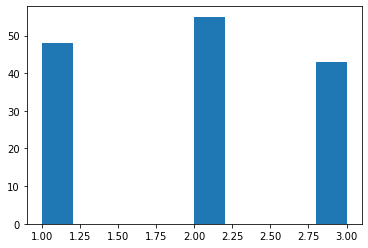

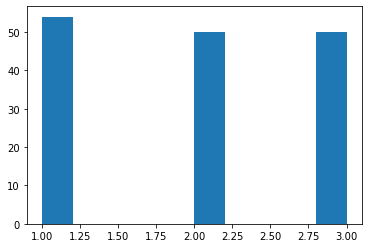

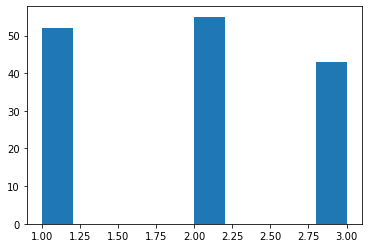

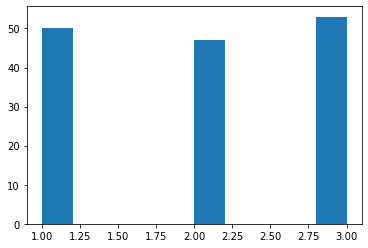

In [72]:
for i in range(4):
    plt.hist(y_train_dict[name_of_models[i]])
    plt.show()

In [73]:
# We see here they have the same parameter
number_of_nodes = 100
print(main_model.fc.weight[0:1,0:5])
print(model_dict["node0"].fc.weight[0:1,0:5])
print(model_dict["node1"].fc.weight[0:1,0:5])
print(model_dict["node2"].fc.weight[0:1,0:5])
print(model_dict["node3"].fc.weight[0:1,0:5])
#print(model_dict["node4"].fc.weight[0:1,0:5])
new = fedavg(main_model, model_dict, number_of_nodes, y_train_dict)

tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)


In [74]:
print(new.fc.weight[0:1,0:5])

tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)


In [75]:
modelA = Mymodel().resnet
modelB = Mymodel().resnet
model_dict["node0"] =modelA
model_dict["node1"] = modelB
print(modelA.fc.weight[0:1,0:5])
print(modelB.fc.weight[0:1,0:5])

tensor([[-0.0049,  0.0208, -0.0136, -0.0141, -0.0226]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0128, -0.0013, -0.0295,  0.0312, -0.0366]],
       grad_fn=<SliceBackward0>)


In [76]:
new = fedavg(main_model, model_dict, number_of_nodes,y_train_dict)
print(main_model.fc.weight[0:1,0:5])
print(new.fc.weight[0:1,0:5])

tensor([[ 0.0331, -0.0289,  0.0314,  0.0043, -0.0364]],
       grad_fn=<SliceBackward0>)
tensor([[ 0.0325, -0.0281,  0.0303,  0.0044, -0.0363]],
       grad_fn=<SliceBackward0>)


# Preprocessing

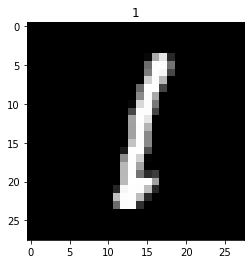

In [78]:
import matplotlib.pyplot as plt
i= 10
image = x_valid_dict['node1'][i]
plt.title('{}'.format( y_valid_dict['node1'][i]))
plt.imshow(image, cmap='gray')
plt.show()

In [79]:
# define custom dataset
class MyDataset(Dataset):
    def __init__(self, feature, target=None, transform=None):

        self.X = feature
        self.Y = target
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.transform is not None:
            return self.transform(self.X[idx]), self.Y[idx]
        elif self.Y is None:
            return [self.X[idx]]
        return self.X[idx], self.Y[idx]

In [80]:
# data reshape
def data_reshape(train_split,train_labels_split,validation_split,validation_labels_split) :
    # test_data = torch.from_numpy(test_split.reshape((-1,1,28,28)))
    train_data = torch.from_numpy(train_split.reshape((-1,1,28,28)))
    train_labels_data =  torch.from_numpy(train_labels_split)
    validation_data = torch.from_numpy(validation_split.reshape((-1,1,28,28)))
    validation_labels_data =  torch.from_numpy(validation_labels_split)
    return train_data, validation_data, train_labels_data,  validation_labels_data

In [81]:
def data_loader(train_data, validation_data, train_labels_data,  validation_labels_data):
    train_set = MyDataset(train_data.float(), train_labels_data)
    valid_set = MyDataset(validation_data.float(), validation_labels_data)
    # test_set = MyDataset(test_data.float())
    batch_size = 32
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True)
    valid_loader = torch.utils.data.DataLoader(valid_set, batch_size = batch_size, shuffle = False)
    # test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = False)
    return train_set, valid_set, train_loader, valid_loader

In [82]:
def transform_load(train_data, train_labels_data, train_set, train_loader): # calculate mean and std of train_set for normalize
    data = next(iter(train_loader))
    mean = data[0].mean()
    std = data[0].std()

    # set transformation option
    transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomAffine(degrees = 30),
            transforms.RandomPerspective(),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)])

    # augmented train_set
    augmented_train_set = MyDataset(train_data.float(), train_labels_data, transform=transform)

    # combine original set with augmented set
    datasets = []
    datasets.append(train_set)
    datasets.append(augmented_train_set)
    train_set = torch.utils.data.ConcatDataset(datasets)

    # redefine train_loader
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True)
    return train_loader

In [83]:
def preprocessing(x_train_dict , y_train_dict, x_valid_dict , y_valid_dict):
    data_resh, data_load,trans = {},{},{}
    for i in x_train_dict.keys() :
        data_resh[i]= data_reshape(x_train_dict[i] , y_train_dict[i], x_valid_dict[i] , y_valid_dict[i])
        data_load[i]= data_loader(data_resh[i][0], data_resh[i][1],data_resh[i][2], data_resh[i][3])
        trans[i] = transform_load(data_resh[i][0], data_resh[i][2], data_load[i][0], data_load[i][2])
    return data_load , trans

In [84]:
data_load, trans = preprocessing(x_train_dict , y_train_dict, x_valid_dict , y_valid_dict)


In [98]:
from tqdm import tqdm
from time import sleep
from tqdm import trange
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models, transforms
import time
import copy
from torch.utils.data import DataLoader, Dataset

def train_model(model, criterion, optimizer, scheduler,  train_loader, valid_loader, train_set, valid_set,num_epochs= 5 ):
    dataloaders = {'train': train_loader, 'val': valid_loader} 
    dataset_sizes= {'train': len(train_set), 'val': len(valid_set)} 
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    pbar = trange(num_epochs, unit="Epoch")
    for epoch in pbar:
        sleep(0.5)
        #print('Epoch {}/{}'.format(epoch +1 , num_epochs))
        #print('-' * 5)

        # Each epoch has a training and validation phase
        pbar.set_description(f"Epoch {epoch}")
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            #    phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        #print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    pbar.close()
    return model

In [86]:
data_load['node0']

(<__main__.MyDataset at 0x1a9519f1ca0>,
 <torch.utils.data.dataloader.DataLoader at 0x1a965f3d700>)

In [87]:
def format_test_data(test_data):
    test_data = torch.from_numpy(test_data.reshape((-1,1,28,28)))
    test_set = MyDataset(test_data.float())
    test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = False)
    return test_loader


In [88]:
def predict(test_loader, model_ft):
    test_pred = torch.LongTensor()
    with torch.no_grad():
        for images in test_loader:
            images = torch.autograd.Variable(images[0])
            if torch.cuda.is_available():
                images = images.to(device)

            outputs = model_ft(images)
            predicted = outputs.cpu().data.max(1, keepdim=True)[1]
            test_pred = torch.cat((test_pred, predicted), dim=0)
    return test_pred

In [89]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
def evaluation_met(test_pred, test_label_split, ratio = 'Balanced data'):  
    filt0 = test_label_split == 0
    filt1 = test_label_split == 1
    filt2 = test_label_split == 2
    filt3 = test_label_split == 3
    acc = accuracy_score(test_pred,test_label_split)   
    acc0 = accuracy_score(test_pred[filt0],test_label_split[filt0])
    acc1 = accuracy_score(test_pred[filt1],test_label_split[filt1])
    acc2 = accuracy_score(test_pred[filt2],test_label_split[filt2])
    acc3 = accuracy_score(test_pred[filt3],test_label_split[filt3])
    print('For {} :, acc : {}, acc0 : {} , acc1:{} , acc2:{}, acc3 :{} '.format(ratio,acc, acc0,acc1, acc2,acc3))
    return {'ratio' : ratio, 'acc' :acc,'acc0':acc0, 'acc1':acc1,'acc2':acc2, 'acc3':acc3}

In [106]:

def training_plan(main_model,model_dict,data_load, Round=15, number_of_nodes=100):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    criterion = nn.CrossEntropyLoss()
   
    for i in range(Round):
        print('Round '+ str(i+1))
        print('Sending main model to nodes in round '+ str(i+1))
        model_dict = send_main_model_to_nodes_and_update_model_dict(main_model, model_dict, number_of_nodes)
        for j in model_dict.keys():
            print('training {} for Round {} :'.format(j,i+1))
            model = model_dict[j].to(device)
            optimizer = optim.SGD(model.parameters(), lr=0.001)
            scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
            train_loader = trans[j]
            valid_loader =  data_load[j][3]
            train_set =  data_load[j][0]
            valid_set =  data_load[j][1]
            model_dict[j] = train_model(model, criterion, optimizer, scheduler,  train_loader, valid_loader, train_set, valid_set)
        print('Fedavg of main model in round '+ str(i+1))
        main_model = fedavg(main_model, model_dict, number_of_nodes,y_train_dict)
        test_loader = format_test_data(x_test)
        pred = predict(test_loader, main_model)
        evaluation_met(pred, y_test,ratio = 'Round '+str(i))
        
    return model_dict, main_model

# Balanced

In [112]:
model_dict_B, model_B = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 0
training node0 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:05<00:00, 85.10s/Epoch]


Training complete in 7m 6s
Best val Acc: 0.983838
training node1 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:01<00:00, 84.26s/Epoch]


Training complete in 7m 1s
Best val Acc: 0.982828
training node2 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:10<00:00, 86.14s/Epoch]


Training complete in 7m 11s
Best val Acc: 0.980808
training node3 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:03<00:00, 84.62s/Epoch]


Training complete in 7m 3s
Best val Acc: 0.984848
training node4 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:07<00:00, 85.52s/Epoch]


Training complete in 7m 8s
Best val Acc: 0.990909
Fedavg of main model in round 1
For Round 0 :, acc : 0.9574212172239596, acc0 : 0.9806122448979592 , acc1:0.9691629955947136 , AUC : 0.329545849880448 
Round 2
Sending main model to nodes in round 1
training node0 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:09<00:00, 85.89s/Epoch]


Training complete in 7m 9s
Best val Acc: 0.989899
training node1 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [06:56<00:00, 83.39s/Epoch]


Training complete in 6m 57s
Best val Acc: 0.987879
training node2 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:04<00:00, 84.94s/Epoch]


Training complete in 7m 5s
Best val Acc: 0.988889
training node3 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:09<00:00, 86.00s/Epoch]


Training complete in 7m 10s
Best val Acc: 0.989899
training node4 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:00<00:00, 84.10s/Epoch]


Training complete in 7m 1s
Best val Acc: 0.991919
Fedavg of main model in round 2
For Round 1 :, acc : 0.9713735867211931, acc0 : 0.9887755102040816 , acc1:0.9744493392070485 , AUC : 0.3273973701894627 
Round 3
Sending main model to nodes in round 2
training node0 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:06<00:00, 85.24s/Epoch]


Training complete in 7m 6s
Best val Acc: 0.992929
training node1 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:09<00:00, 85.83s/Epoch]


Training complete in 7m 9s
Best val Acc: 0.993939
training node2 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [06:57<00:00, 83.57s/Epoch]


Training complete in 6m 58s
Best val Acc: 0.989899
training node3 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:09<00:00, 85.95s/Epoch]


Training complete in 7m 10s
Best val Acc: 0.991919
training node4 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:20<00:00, 88.13s/Epoch]


Training complete in 7m 21s
Best val Acc: 0.994949
Fedavg of main model in round 3
For Round 2 :, acc : 0.9771469809959105, acc0 : 0.9897959183673469 , acc1:0.9797356828193833 , AUC : 0.32678608933844233 
Round 4
Sending main model to nodes in round 3
training node0 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [06:56<00:00, 83.25s/Epoch]


Training complete in 6m 56s
Best val Acc: 0.994949
training node1 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:07<00:00, 85.43s/Epoch]


Training complete in 7m 7s
Best val Acc: 0.990909
training node2 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:10<00:00, 86.14s/Epoch]


Training complete in 7m 11s
Best val Acc: 0.994949
training node3 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:02<00:00, 84.42s/Epoch]


Training complete in 7m 2s
Best val Acc: 0.993939
training node4 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:16<00:00, 87.26s/Epoch]


Training complete in 7m 16s
Best val Acc: 0.995960
Fedavg of main model in round 4
For Round 3 :, acc : 0.9817175847967284, acc0 : 0.9918367346938776 , acc1:0.9841409691629956 , AUC : 0.3262341137045218 
Round 5
Sending main model to nodes in round 4
training node0 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:05<00:00, 85.05s/Epoch]


Training complete in 7m 5s
Best val Acc: 0.996970
training node1 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [06:57<00:00, 83.57s/Epoch]


Training complete in 6m 58s
Best val Acc: 0.992929
training node2 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:14<00:00, 86.94s/Epoch]


Training complete in 7m 15s
Best val Acc: 0.994949
training node3 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:13<00:00, 86.63s/Epoch]


Training complete in 7m 13s
Best val Acc: 0.991919
training node4 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [06:59<00:00, 83.97s/Epoch]


Training complete in 6m 60s
Best val Acc: 0.996970
Fedavg of main model in round 5
For Round 4 :, acc : 0.9824392590810681, acc0 : 0.9918367346938776 , acc1:0.9823788546255506 , AUC : 0.3260905675243427 


In [123]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_B)
evaluation_met(pred, y_test,ratio = 'Balanced data ')

For Balanced data  :, acc : 0.9824392590810681, acc0 : 0.9918367346938776 , acc1:0.9823788546255506 , acc2:0.9806201550387597, acc3 :0.9752475247524752 


{'ratio': 'Balanced data ',
 'acc': 0.9824392590810681,
 'acc0': 0.9918367346938776,
 'acc1': 0.9823788546255506,
 'acc2': 0.9806201550387597,
 'acc3': 0.9752475247524752}

In [124]:
for i in range(number_of_nodes): 
    test_loader = format_test_data(x_test)
    pred = predict(test_loader, model_dict_B[name_of_models[i]])
    evaluation_met(pred, y_test,ratio = 'Balanced data ' + name_of_models[i])

For Balanced data node0 :, acc : 0.9944671638200625, acc0 : 0.996938775510204 , acc1:0.9973568281938326 , acc2:0.9912790697674418, acc3 :0.9920792079207921 
For Balanced data node1 :, acc : 0.9947077219148425, acc0 : 0.9948979591836735 , acc1:0.9973568281938326 , acc2:0.9903100775193798, acc3 :0.996039603960396 
For Balanced data node2 :, acc : 0.9937454895357228, acc0 : 0.9979591836734694 , acc1:0.9964757709251101 , acc2:0.9883720930232558, acc3 :0.9920792079207921 
For Balanced data node3 :, acc : 0.9942266057252827, acc0 : 0.9959183673469387 , acc1:0.9973568281938326 , acc2:0.9874031007751938, acc3 :0.996039603960396 
For Balanced data node4 :, acc : 0.993504931440943, acc0 : 0.9948979591836735 , acc1:0.9964757709251101 , acc2:0.9874031007751938, acc3 :0.995049504950495 


# Missing values in nodes 0,1,2,3

In [89]:
model_dict_miss, model_miss = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 0
training node0 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [05:33<00:00, 66.70s/Epoch]


Training complete in 5m 34s
Best val Acc: 0.739394
training node1 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [05:48<00:00, 69.68s/Epoch]


Training complete in 5m 48s
Best val Acc: 0.719192
training node2 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [06:03<00:00, 72.77s/Epoch]


Training complete in 6m 4s
Best val Acc: 0.755556
training node3 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [05:44<00:00, 68.95s/Epoch]


Training complete in 5m 45s
Best val Acc: 0.746465
training node4 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [07:34<00:00, 90.99s/Epoch]


Training complete in 7m 35s
Best val Acc: 0.976768
Fedavg of main model in round 1
For Round 0 :, acc : 0.9146018763531393, acc0 : 0.9438775510204082 , acc1:0.9806167400881057 , acc2:0.8449612403100775, acc3 :0.8831683168316832 
Round 2
Sending main model to nodes in round 1
training node0 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [05:26<00:00, 65.23s/Epoch]


Training complete in 5m 26s
Best val Acc: 0.821212
training node1 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [05:45<00:00, 69.04s/Epoch]


Training complete in 5m 45s
Best val Acc: 0.773737
training node2 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [05:58<00:00, 71.63s/Epoch]


Training complete in 5m 58s
Best val Acc: 0.797980
training node3 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [05:37<00:00, 67.54s/Epoch]


Training complete in 5m 38s
Best val Acc: 0.756566
training node4 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:04<00:00, 84.82s/Epoch]


Training complete in 7m 4s
Best val Acc: 0.988889
Fedavg of main model in round 2
For Round 1 :, acc : 0.9550156362761607, acc0 : 0.9683673469387755 , acc1:0.9823788546255506 , acc2:0.9234496124031008, acc3 :0.9435643564356435 
Round 3
Sending main model to nodes in round 2
training node0 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [05:23<00:00, 64.64s/Epoch]


Training complete in 5m 23s
Best val Acc: 0.894949
training node1 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [05:43<00:00, 68.79s/Epoch]


Training complete in 5m 44s
Best val Acc: 0.804040
training node2 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [05:55<00:00, 71.19s/Epoch]


Training complete in 5m 56s
Best val Acc: 0.851515
training node3 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [05:41<00:00, 68.20s/Epoch]


Training complete in 5m 41s
Best val Acc: 0.790909
training node4 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:08<00:00, 85.78s/Epoch]


Training complete in 7m 9s
Best val Acc: 0.987879
Fedavg of main model in round 3
For Round 2 :, acc : 0.9677652152994948, acc0 : 0.9836734693877551 , acc1:0.9814977973568282 , acc2:0.9467054263565892, acc3 :0.9584158415841584 
Round 4
Sending main model to nodes in round 3
training node0 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [05:47<00:00, 69.42s/Epoch]


Training complete in 5m 47s
Best val Acc: 0.893939
training node1 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [05:40<00:00, 68.07s/Epoch]


Training complete in 5m 40s
Best val Acc: 0.851515
training node2 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [05:30<00:00, 66.06s/Epoch]


Training complete in 5m 30s
Best val Acc: 0.864646
training node3 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [05:29<00:00, 65.99s/Epoch]


Training complete in 5m 30s
Best val Acc: 0.830303
training node4 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:34<00:00, 90.90s/Epoch]


Training complete in 7m 35s
Best val Acc: 0.988889
Fedavg of main model in round 4
For Round 3 :, acc : 0.9776280971854703, acc0 : 0.9857142857142858 , acc1:0.9850220264317181 , acc2:0.9660852713178295, acc3 :0.9732673267326732 
Round 5
Sending main model to nodes in round 4
training node0 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [05:41<00:00, 68.36s/Epoch]


Training complete in 5m 42s
Best val Acc: 0.938384
training node1 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [05:15<00:00, 63.04s/Epoch]


Training complete in 5m 15s
Best val Acc: 0.904040
training node2 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [05:42<00:00, 68.45s/Epoch]


Training complete in 5m 42s
Best val Acc: 0.879798
training node3 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [05:47<00:00, 69.42s/Epoch]


Training complete in 5m 47s
Best val Acc: 0.834343
training node4 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:17<00:00, 87.59s/Epoch]


Training complete in 7m 18s
Best val Acc: 0.993939
Fedavg of main model in round 5
For Round 4 :, acc : 0.9793120038489295, acc0 : 0.986734693877551 , acc1:0.9841409691629956 , acc2:0.9680232558139535, acc3 :0.9782178217821782 


In [90]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_miss)
evaluation_met(pred, y_test,ratio = 'Nodes with missing values')

For Nodes with missing values :, acc : 0.9793120038489295, acc0 : 0.986734693877551 , acc1:0.9841409691629956 , acc2:0.9680232558139535, acc3 :0.9782178217821782 


{'ratio': 'Nodes with missing values',
 'acc': 0.9793120038489295,
 'acc0': 0.986734693877551,
 'acc1': 0.9841409691629956,
 'acc2': 0.9680232558139535,
 'acc3': 0.9782178217821782}

In [91]:
for i in range(number_of_nodes): 
    test_loader = format_test_data(x_test)
    pred = predict(test_loader, model_dict_miss[name_of_models[i]])
    evaluation_met(pred, y_test,ratio = 'Balanced data ' + name_of_models[i])

For Balanced data node0 :, acc : 0.9533317296127015, acc0 : 0.8377551020408164 , acc1:0.9903083700440528 , acc2:0.9864341085271318, acc3 :0.9900990099009901 
For Balanced data node1 :, acc : 0.9004089487611258, acc0 : 0.9948979591836735 , acc1:0.6625550660792952 , acc2:0.9835271317829457, acc3 :0.9910891089108911 
For Balanced data node2 :, acc : 0.8821265335578542, acc0 : 0.996938775510204 , acc1:0.9973568281938326 , acc2:0.5358527131782945, acc3 :0.995049504950495 
For Balanced data node3 :, acc : 0.8407505412557132, acc0 : 0.9979591836734694 , acc1:0.9903083700440528 , acc2:0.9941860465116279, acc3 :0.36336633663366336 
For Balanced data node4 :, acc : 0.991339908587924, acc0 : 0.9897959183673469 , acc1:0.9920704845814978 , acc2:0.9893410852713178, acc3 :0.994059405940594 


# No nodes with all values 4 nodes

In [102]:
model_dict_allmiss, model_allmiss = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 0
training node0 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [06:25<00:00, 77.04s/Epoch]


Training complete in 6m 25s
Best val Acc: 0.738288
training node1 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [06:26<00:00, 77.22s/Epoch]


Training complete in 6m 26s
Best val Acc: 0.714863
training node2 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [06:50<00:00, 82.17s/Epoch]


Training complete in 6m 51s
Best val Acc: 0.762520
training node3 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [06:37<00:00, 79.49s/Epoch]


Training complete in 6m 37s
Best val Acc: 0.747173
Fedavg of main model in round 1
For Round 0 :, acc : 0.8638441183545826, acc0 : 0.9571428571428572 , acc1:0.9718061674008811 , acc2:0.624031007751938, acc3 :0.897029702970297 
Round 2
Sending main model to nodes in round 1
training node0 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [07:12<00:00, 86.44s/Epoch]


Training complete in 7m 12s
Best val Acc: 0.769790
training node1 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [06:54<00:00, 82.84s/Epoch]


Training complete in 6m 54s
Best val Acc: 0.774637
training node2 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [06:53<00:00, 82.73s/Epoch]


Training complete in 6m 54s
Best val Acc: 0.765751
training node3 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [06:37<00:00, 79.41s/Epoch]


Training complete in 6m 37s
Best val Acc: 0.752827
Fedavg of main model in round 2
For Round 1 :, acc : 0.9131585277844599, acc0 : 0.9887755102040816 , acc1:0.9841409691629956 , acc2:0.7761627906976745, acc3 :0.9 
Round 3
Sending main model to nodes in round 2
training node0 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [06:59<00:00, 83.88s/Epoch]


Training complete in 6m 59s
Best val Acc: 0.790792
training node1 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [06:54<00:00, 82.95s/Epoch]


Training complete in 6m 55s
Best val Acc: 0.886107
training node2 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [06:48<00:00, 81.61s/Epoch]


Training complete in 6m 48s
Best val Acc: 0.772213
training node3 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [07:03<00:00, 84.67s/Epoch]


Training complete in 7m 3s
Best val Acc: 0.754443
Fedavg of main model in round 3
For Round 2 :, acc : 0.9343276401250902, acc0 : 0.9908163265306122 , acc1:0.9814977973568282 , acc2:0.8662790697674418, acc3 :0.8960396039603961 
Round 4
Sending main model to nodes in round 3
training node0 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:22<00:00, 88.42s/Epoch]


Training complete in 7m 22s
Best val Acc: 0.840872
training node1 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [07:59<00:00, 95.95s/Epoch] 


Training complete in 7m 60s
Best val Acc: 0.916801
training node2 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [10:05<00:00, 121.19s/Epoch]


Training complete in 10m 6s
Best val Acc: 0.798869
training node3 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [10:09<00:00, 121.99s/Epoch]


Training complete in 10m 10s
Best val Acc: 0.752019
Fedavg of main model in round 4
For Round 3 :, acc : 0.9446716382006255, acc0 : 0.9897959183673469 , acc1:0.9779735682819384 , acc2:0.875, acc3 :0.9346534653465347 
Round 5
Sending main model to nodes in round 4
training node0 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [10:13<00:00, 122.65s/Epoch]


Training complete in 10m 13s
Best val Acc: 0.877221
training node1 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:22<00:00, 88.56s/Epoch]


Training complete in 7m 23s
Best val Acc: 0.912763
training node2 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:59<00:00, 95.96s/Epoch]


Training complete in 7m 60s
Best val Acc: 0.818255
training node3 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [07:32<00:00, 90.46s/Epoch] 


Training complete in 7m 32s
Best val Acc: 0.753635
Fedavg of main model in round 5
For Round 4 :, acc : 0.9518883810440222, acc0 : 0.9897959183673469 , acc1:0.9797356828193833 , acc2:0.9137596899224806, acc3 :0.9227722772277228 


In [104]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_allmiss)
evaluation_met(pred, y_test,ratio = 'Nodes with missing values')

For Nodes with missing values :, acc : 0.9518883810440222, acc0 : 0.9897959183673469 , acc1:0.9797356828193833 , acc2:0.9137596899224806, acc3 :0.9227722772277228 


{'ratio': 'Nodes with missing values',
 'acc': 0.9518883810440222,
 'acc0': 0.9897959183673469,
 'acc1': 0.9797356828193833,
 'acc2': 0.9137596899224806,
 'acc3': 0.9227722772277228}

In [105]:
for i in range(number_of_nodes): 
    test_loader = format_test_data(x_test)
    pred = predict(test_loader, model_dict_allmiss[name_of_models[i]])
    evaluation_met(pred, y_test,ratio = 'Balanced data ' + name_of_models[i])

For Balanced data node0 :, acc : 0.8864565792638922, acc0 : 0.5663265306122449 , acc1:0.9911894273127754 , acc2:0.9874031007751938, acc3 :0.9762376237623762 
For Balanced data node1 :, acc : 0.9191724801539571, acc0 : 0.9928571428571429 , acc1:0.760352422907489 , acc2:0.9660852713178295, acc3 :0.9782178217821782 
For Balanced data node2 :, acc : 0.8053885013230695, acc0 : 0.9928571428571429 , acc1:0.9964757709251101 , acc2:0.23062015503875968, acc3 :0.996039603960396 
For Balanced data node3 :, acc : 0.7490979071445755, acc0 : 0.9959183673469387 , acc1:0.9947136563876652 , acc2:0.9777131782945736, acc3 :0.0 


# 100 nodes 

In [91]:
model_dict_allmiss100, model_allmiss100 = training_plan(main_model,model_dict,data_load)

Round 1
Sending main model to nodes in round 0
training node0 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node1 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.74s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node2 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node3 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node4 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.73s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node5 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.500000
training node6 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.78s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node7 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.440000
training node8 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node9 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node10 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.620000
training node11 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node12 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.520000
training node13 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.480000
training node14 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node15 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.540000
training node16 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.500000
training node17 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node18 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node19 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.280000
training node20 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.540000
training node21 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node22 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node23 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node24 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node25 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.400000
training node26 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.460000
training node27 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.420000
training node28 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.500000
training node29 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.400000
training node30 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.480000
training node31 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.420000
training node32 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.480000
training node33 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.460000
training node34 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.420000
training node35 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.420000
training node36 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.440000
training node37 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node38 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.500000
training node39 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.380000
training node40 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.380000
training node41 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.400000
training node42 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.500000
training node43 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.400000
training node44 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.460000
training node45 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.460000
training node46 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.320000
training node47 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.360000
training node48 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.460000
training node49 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.480000
training node50 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node51 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node52 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.500000
training node53 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node54 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.420000
training node55 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node56 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node57 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node58 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node59 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node60 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node61 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.500000
training node62 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node63 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.520000
training node64 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node65 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.11s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.700000
training node66 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node67 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node68 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node69 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.18s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.720000
training node70 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node71 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.12s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.520000
training node72 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node73 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.12s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.540000
training node74 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.540000
training node75 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node76 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node77 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node78 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node79 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node80 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.460000
training node81 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node82 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.460000
training node83 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node84 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node85 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.340000
training node86 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.520000
training node87 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.460000
training node88 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.520000
training node89 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.580000
training node90 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node91 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node92 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node93 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node94 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node95 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node96 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.480000
training node97 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node98 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node99 for Round 0 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
Fedavg of main model in round 1
For Round 0 :, acc : 0.4948280009622324, acc0 : 0.5091836734693878 , acc1:0.7268722466960352 , acc2:0.3682170542635659, acc3 :0.3495049504950495 
Round 2
Sending main model to nodes in round 1
training node0 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node1 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node2 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node3 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node4 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.10s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.640000
training node5 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node6 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node7 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.540000
training node8 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.78s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node9 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.24s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.640000
training node10 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node11 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.14s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.580000
training node12 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node13 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node14 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.16s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.700000
training node15 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node16 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.580000
training node17 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.27s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.640000
training node18 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.16s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.600000
training node19 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node20 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.21s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.600000
training node21 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.18s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.580000
training node22 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.17s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.680000
training node23 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.17s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.660000
training node24 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.23s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.680000
training node25 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node26 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.14s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.580000
training node27 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.540000
training node28 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.17s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.660000
training node29 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node30 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node31 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.580000
training node32 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node33 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node34 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node35 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node36 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.680000
training node37 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node38 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.53s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node39 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node40 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node41 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node42 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node43 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.51s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node44 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.540000
training node45 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node46 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.460000
training node47 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.660000
training node48 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.54s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node49 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node50 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node51 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node52 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node53 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node54 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node55 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node56 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node57 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.680000
training node58 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node59 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node60 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node61 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node62 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.660000
training node63 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node64 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node65 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node66 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node67 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.680000
training node68 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node69 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node70 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node71 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node72 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node73 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node74 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node75 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node76 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node77 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node78 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node79 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.440000
training node80 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.540000
training node81 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node82 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node83 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node84 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node85 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.520000
training node86 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node87 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node88 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node89 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node90 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node91 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:22<00:00,  4.41s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.660000
training node92 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.17s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.620000
training node93 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.73s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node94 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node95 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node96 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.560000
training node97 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node98 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node99 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
Fedavg of main model in round 2
For Round 1 :, acc : 0.576136636997835, acc0 : 0.6214285714285714 , acc1:0.8845814977973568 , acc2:0.39244186046511625, acc3 :0.37326732673267327 
Round 3
Sending main model to nodes in round 2
training node0 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node1 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node2 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node3 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node4 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node5 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node6 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node7 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node8 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.54s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.680000
training node9 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node10 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.660000
training node11 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node12 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.620000
training node13 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node14 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node15 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node16 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node17 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node18 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node19 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.520000
training node20 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node21 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node22 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node23 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node24 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node25 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node26 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node27 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node28 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node29 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node30 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node31 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node32 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node33 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node34 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node35 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.660000
training node36 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node37 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.880000
training node38 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.74s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node39 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.560000
training node40 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node41 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node42 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node43 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node44 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node45 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node46 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.460000
training node47 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.78s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node48 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node49 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node50 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node51 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node52 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node53 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node54 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.640000
training node55 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node56 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node57 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.78s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node58 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node59 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node60 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node61 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node62 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node63 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node64 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node65 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node66 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node67 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node68 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node69 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node70 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node71 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node72 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node73 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node74 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node75 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node76 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node77 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.600000
training node78 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node79 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node80 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node81 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node82 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.620000
training node83 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node84 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node85 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.500000
training node86 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node87 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node88 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node89 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node90 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node91 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node92 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node93 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node94 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node95 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node96 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node97 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node98 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node99 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
Fedavg of main model in round 3
For Round 2 :, acc : 0.6249699302381525, acc0 : 0.6653061224489796 , acc1:0.9162995594713657 , acc2:0.4622093023255814, acc3 :0.42475247524752474 
Round 4
Sending main model to nodes in round 3
training node0 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node1 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node2 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node3 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node4 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node5 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node6 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node7 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node8 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node9 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node10 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node11 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node12 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node13 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node14 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node15 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.11s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.820000
training node16 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node17 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node18 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.11s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.720000
training node19 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node20 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node21 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node22 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node23 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node24 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node25 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node26 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node27 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node28 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node29 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node30 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node31 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.700000
training node32 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node33 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.880000
training node34 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node35 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node36 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.54s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node37 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.880000
training node38 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node39 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node40 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node41 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node42 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node43 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.54s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node44 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node45 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node46 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.440000
training node47 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.680000
training node48 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.54s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node49 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node50 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node51 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node52 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node53 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.10s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.760000
training node54 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node55 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node56 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node57 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node58 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node59 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node60 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node61 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node62 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.74s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node63 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node64 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node65 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.17s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.760000
training node66 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node67 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node68 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node69 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.18s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.820000
training node70 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node71 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node72 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node73 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node74 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node75 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node76 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node77 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node78 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node79 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node80 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.600000
training node81 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node82 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.640000
training node83 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node84 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node85 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.520000
training node86 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node87 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node88 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node89 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node90 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node91 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node92 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.620000
training node93 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node94 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node95 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node96 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.620000
training node97 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node98 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node99 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
Fedavg of main model in round 4
For Round 3 :, acc : 0.6485446235265817, acc0 : 0.7091836734693877 , acc1:0.9136563876651982 , acc2:0.4844961240310077, acc3 :0.4594059405940594 
Round 5
Sending main model to nodes in round 4
training node0 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node1 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node2 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node3 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node4 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node5 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node6 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node7 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node8 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.720000
training node9 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node10 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node11 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node12 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node13 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node14 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node15 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node16 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node17 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node18 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node19 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.29s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.560000
training node20 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.28s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.740000
training node21 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.20s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.760000
training node22 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node23 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node24 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.12s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.820000
training node25 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node26 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node27 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node28 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node29 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node30 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.920000
training node31 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node32 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node33 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.900000
training node34 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node35 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node36 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node37 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node38 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.900000
training node39 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node40 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node41 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node42 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.27s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.720000
training node43 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node44 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node45 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node46 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node47 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node48 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.53s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node49 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node50 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node51 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node52 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node53 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node54 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.680000
training node55 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node56 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node57 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node58 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node59 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node60 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node61 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node62 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node63 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node64 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node65 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node66 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node67 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node68 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node69 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node70 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node71 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node72 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node73 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.11s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.740000
training node74 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node75 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node76 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node77 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node78 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node79 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node80 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.640000
training node81 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node82 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node83 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node84 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node85 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.400000
training node86 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node87 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node88 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.660000
training node89 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.14s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.740000
training node90 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node91 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node92 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node93 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node94 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node95 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.700000
training node96 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.660000
training node97 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.15s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.780000
training node98 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.19s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.700000
training node99 for Round 4 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.14s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.760000
Fedavg of main model in round 5
For Round 4 :, acc : 0.6771710368053885, acc0 : 0.7408163265306122 , acc1:0.9259911894273127 , acc2:0.5174418604651163, acc3 :0.499009900990099 


In [92]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_allmiss100)
evaluation_met(pred, y_test,ratio = 'Nodes with missing values')

For Nodes with missing values :, acc : 0.6771710368053885, acc0 : 0.7408163265306122 , acc1:0.9259911894273127 , acc2:0.5174418604651163, acc3 :0.499009900990099 


{'ratio': 'Nodes with missing values',
 'acc': 0.6771710368053885,
 'acc0': 0.7408163265306122,
 'acc1': 0.9259911894273127,
 'acc2': 0.5174418604651163,
 'acc3': 0.499009900990099}

In [93]:
for i in range(number_of_nodes): 
    test_loader = format_test_data(x_test)
    pred = predict(test_loader, model_dict_allmiss100[name_of_models[i]])
    evaluation_met(pred, y_test,ratio = 'Balanced data ' + name_of_models[i])

For Balanced data node0 :, acc : 0.7368294443108011, acc0 : 0.39183673469387753 , acc1:0.9726872246696036 , acc2:0.7742248062015504, acc3 :0.7683168316831683 
For Balanced data node1 :, acc : 0.756555208082752, acc0 : 0.6142857142857143 , acc1:0.9859030837004406 , acc2:0.6802325581395349, acc3 :0.7148514851485148 
For Balanced data node2 :, acc : 0.7474140004811162, acc0 : 0.6275510204081632 , acc1:0.9788546255506608 , acc2:0.7383720930232558, acc3 :0.6128712871287129 
For Balanced data node3 :, acc : 0.7454895357228771, acc0 : 0.513265306122449 , acc1:0.9770925110132158 , acc2:0.688953488372093, acc3 :0.7683168316831683 
For Balanced data node4 :, acc : 0.7613663699783497, acc0 : 0.5877551020408164 , acc1:0.9814977973568282 , acc2:0.6569767441860465, acc3 :0.7891089108910891 
For Balanced data node5 :, acc : 0.7409189319220592, acc0 : 0.5428571428571428 , acc1:0.9841409691629956 , acc2:0.6337209302325582, acc3 :0.7693069306930693 
For Balanced data node6 :, acc : 0.7517440461871542, a

For Balanced data node52 :, acc : 0.7438056290594178, acc0 : 0.8908163265306123 , acc1:0.9903083700440528 , acc2:0.2558139534883721, acc3 :0.8227722772277227 
For Balanced data node53 :, acc : 0.7074813567476546, acc0 : 0.9448979591836735 , acc1:0.9911894273127754 , acc2:0.09593023255813954, acc3 :0.7831683168316832 
For Balanced data node54 :, acc : 0.6449362521048834, acc0 : 0.8908163265306123 , acc1:0.8440528634361234 , acc2:0.041666666666666664, acc3 :0.799009900990099 
For Balanced data node55 :, acc : 0.7317777243204234, acc0 : 0.9122448979591836 , acc1:0.9823788546255506 , acc2:0.12015503875968993, acc3 :0.9 
For Balanced data node56 :, acc : 0.706519124368535, acc0 : 0.8969387755102041 , acc1:0.9903083700440528 , acc2:0.06395348837209303, acc3 :0.8594059405940594 
For Balanced data node57 :, acc : 0.754390185229733, acc0 : 0.8734693877551021 , acc1:0.9841409691629956 , acc2:0.36724806201550386, acc3 :0.7762376237623763 
For Balanced data node58 :, acc : 0.7440461871541978, acc0

# 100 nodes 15 rounds

In [ ]:
model_dict_allmiss100_15, model_allmiss100_15 = training_plan(model_allmiss100,model_dict,data_load)

Round 1
Sending main model to nodes in round 1
training node0 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node1 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:23<00:00,  4.69s/Epoch]


Training complete in 0m 23s
Best val Acc: 0.860000
training node2 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:22<00:00,  4.47s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.820000
training node3 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.38s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.860000
training node4 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.23s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.780000
training node5 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.15s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.860000
training node6 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.35s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.780000
training node7 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node8 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node9 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node10 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node11 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node12 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node13 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node14 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node15 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node16 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node17 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.80s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node18 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node19 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node20 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node21 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node22 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node23 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node24 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node25 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node26 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node27 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.79s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node28 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node29 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node30 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.900000
training node31 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node32 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.84s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node33 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.920000
training node34 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node35 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node36 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.52s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.880000
training node37 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.60s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.900000
training node38 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.880000
training node39 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node40 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node41 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node42 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node43 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.52s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node44 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node45 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node46 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node47 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.73s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node48 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node49 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node50 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.880000
training node51 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node52 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node53 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node54 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node55 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node56 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node57 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node58 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node59 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node60 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node61 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.87s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node62 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node63 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node64 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node65 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.07s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node66 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node67 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.73s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node68 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node69 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node70 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node71 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.760000
training node72 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node73 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node74 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node75 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.840000
training node76 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node77 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node78 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node79 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node80 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.600000
training node81 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node82 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.76s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.720000
training node83 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node84 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node85 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.700000
training node86 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.74s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node87 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node88 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node89 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node90 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node91 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node92 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.580000
training node93 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node94 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.880000
training node95 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node96 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node97 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node98 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.680000
training node99 for Round 1 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
Fedavg of main model in round 1
For Round 0 :, acc : 0.6920856386817417, acc0 : 0.7612244897959184 , acc1:0.9180616740088106 , acc2:0.5513565891472868, acc3 :0.5148514851485149 
Round 2
Sending main model to nodes in round 2
training node0 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node1 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node2 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node3 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.880000
training node4 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node5 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.880000
training node6 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node7 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node8 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node9 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node10 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.71s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.880000
training node11 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node12 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.72s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node13 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.67s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node14 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.02s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node15 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node16 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.74s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node17 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node18 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node19 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.620000
training node20 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.10s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.820000
training node21 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node22 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node23 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node24 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.03s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node25 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.78s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.740000
training node26 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.09s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node27 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node28 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.06s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node29 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node30 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.940000
training node31 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node32 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node33 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node34 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node35 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node36 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.63s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.900000
training node37 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.77s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.880000
training node38 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.75s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node39 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.94s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node40 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node41 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node42 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node43 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node44 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.81s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node45 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.12s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.880000
training node46 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:22<00:00,  4.45s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.480000
training node47 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.16s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.800000
training node48 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.65s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.880000
training node49 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node50 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.25s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.900000
training node51 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.50s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node52 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.44s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.780000
training node53 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node54 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:22<00:00,  4.46s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.620000
training node55 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.34s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.780000
training node56 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node57 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.05s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node58 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:29<00:00,  5.89s/Epoch]


Training complete in 0m 29s
Best val Acc: 0.880000
training node59 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:23<00:00,  4.61s/Epoch]


Training complete in 0m 23s
Best val Acc: 0.840000
training node60 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.40s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.840000
training node61 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.29s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.760000
training node62 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:15<00:00,  3.14s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.860000
training node63 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:15<00:00,  3.13s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.820000
training node64 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node65 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node66 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.50s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node67 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.25s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.780000
training node68 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node69 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node70 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.840000
training node71 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node72 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.96s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node73 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node74 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.86s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.780000
training node75 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.89s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.900000
training node76 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node77 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node78 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node79 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.83s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.540000
training node80 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.64s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node81 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node82 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.66s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node83 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.01s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
training node84 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.91s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node85 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.82s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.560000
training node86 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.69s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node87 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node88 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.95s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.740000
training node89 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.99s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node90 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node91 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node92 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.90s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.600000
training node93 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node94 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.88s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.860000
training node95 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.68s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.700000
training node96 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.740000
training node97 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.92s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node98 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node99 for Round 2 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.820000
Fedavg of main model in round 2
For Round 1 :, acc : 0.7115708443589127, acc0 : 0.7795918367346939 , acc1:0.9224669603524229 , acc2:0.561046511627907, acc3 :0.5623762376237624 
Round 3
Sending main model to nodes in round 3
training node0 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:24<00:00,  4.85s/Epoch]


Training complete in 0m 24s
Best val Acc: 0.820000
training node1 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:23<00:00,  4.72s/Epoch]


Training complete in 0m 24s
Best val Acc: 0.880000
training node2 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:23<00:00,  4.80s/Epoch]


Training complete in 0m 24s
Best val Acc: 0.840000
training node3 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:25<00:00,  5.08s/Epoch]


Training complete in 0m 25s
Best val Acc: 0.860000
training node4 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:23<00:00,  4.64s/Epoch]


Training complete in 0m 23s
Best val Acc: 0.780000
training node5 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.97s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.880000
training node6 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.11s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.800000
training node7 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.04s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.720000
training node8 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.41s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.760000
training node9 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.48s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.800000
training node10 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:15<00:00,  3.19s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.840000
training node11 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.42s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.780000
training node12 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.28s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.780000
training node13 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.23s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.820000
training node14 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.880000
training node15 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.47s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.860000
training node16 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.28s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.780000
training node17 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.840000
training node18 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.50s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node19 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.42s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.480000
training node20 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.800000
training node21 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.61s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node22 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.53s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.920000
training node23 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.73s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.800000
training node24 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.98s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.780000
training node25 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.16s/Epoch]


Training complete in 0m 21s
Best val Acc: 0.780000
training node26 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:21<00:00,  4.30s/Epoch]


Training complete in 0m 22s
Best val Acc: 0.880000
training node27 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.93s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.760000
training node28 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:19<00:00,  3.85s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.820000
training node29 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.840000
training node30 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.30s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.940000
training node31 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.25s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.860000
training node32 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.44s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.780000
training node33 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.31s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.880000
training node34 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.35s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.860000
training node35 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.31s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.800000
training node36 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:15<00:00,  3.19s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.880000
training node37 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.33s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.880000
training node38 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.28s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.900000
training node39 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.44s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.860000
training node40 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.26s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.880000
training node41 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.23s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.800000
training node42 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.53s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node43 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.25s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.780000
training node44 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.29s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.840000
training node45 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.49s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.880000
training node46 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.43s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.700000
training node47 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.29s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.800000
training node48 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.23s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.940000
training node49 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.51s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node50 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.50s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.880000
training node51 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node52 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.28s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.820000
training node53 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.51s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.800000
training node54 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.45s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.760000
training node55 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.55s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node56 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.48s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.780000
training node57 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.30s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.780000
training node58 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.52s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node59 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.51s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.840000
training node60 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.44s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.820000
training node61 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.46s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.740000
training node62 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.25s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.860000
training node63 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.31s/Epoch]


Training complete in 0m 17s
Best val Acc: 0.820000
training node64 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.58s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.820000
training node65 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.62s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node66 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.56s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.760000
training node67 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:16<00:00,  3.28s/Epoch]


Training complete in 0m 16s
Best val Acc: 0.800000
training node68 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.57s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.780000
training node69 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:17<00:00,  3.59s/Epoch]


Training complete in 0m 18s
Best val Acc: 0.860000
training node70 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:18<00:00,  3.70s/Epoch]


Training complete in 0m 19s
Best val Acc: 0.880000
training node71 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.00s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.800000
training node72 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:24<00:00,  4.89s/Epoch]


Training complete in 0m 24s
Best val Acc: 0.760000
training node73 for Round 3 :


Epoch 4: 100%|██████████| 5/5 [00:20<00:00,  4.08s/Epoch]


Training complete in 0m 20s
Best val Acc: 0.860000
training node74 for Round 3 :


Epoch 3:  60%|██████    | 3/5 [00:11<00:07,  3.73s/Epoch]

In [ ]:
test_loader = format_test_data(x_test)
pred = predict(test_loader, model_allmiss100_15)
evaluation_met(pred, y_test,ratio = 'Nodes with missing values')

In [ ]:
for i in range(number_of_nodes): 
    test_loader = format_test_data(x_test)
    pred = predict(test_loader, model_dict_allmiss100_15[name_of_models[i]])
    evaluation_met(pred, y_test,ratio = 'Balanced data ' + name_of_models[i])